In [2]:
!pip install scikit-plot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns; sns.set()
from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Bidirectional

from keras.utils.vis_utils import plot_model
from keras.utils.np_utils import to_categorical
from keras.utils import np_utils

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import confusion_matrix
import statsmodels as sm
from sklearn import svm
import string
import re
import sys
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
# Import tools needed for visualization
from sklearn.tree import export_graphviz
import pydot
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split,KFold,cross_val_score,KFold
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve, auc
from imblearn.metrics import classification_report_imbalanced
from sklearn.model_selection import GridSearchCV
np.random.seed(0)

from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler

#importer les biblio
import sklearn.metrics as metrics
import sklearn
import pandas as pd
import pandas_profiling as pp
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib import pyplot
import scikitplot as skplt

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
number_of_samples = 1100

In [6]:
data_attack = pd.read_csv('/content/drive/MyDrive/ddos_udp1/out-ddos.csv', nrows = number_of_samples)

In [7]:
data_normal = pd.read_csv('/content/drive/MyDrive/ddos_udp1/out-normal.csv', nrows = number_of_samples)

In [8]:
data_normal.columns=[ 'frame.len', 'ip.hdr_len', 'ip.len', 'ip.flags.rb', 'ip.flags.df',
       'ip.flags.mf', 'ip.frag_offset', 'ip.ttl', 'ip.proto',
       'udp.checksum.status', 'udp.dstport', 'udp.length', 'udp.port',
       'udp.srcport', 'udp.stream', 'udp.time_delta', 'udp.time_relative','class']
data_attack.columns=[ 'frame.len', 'ip.hdr_len', 'ip.len', 'ip.flags.rb', 'ip.flags.df',
       'ip.flags.mf', 'ip.frag_offset', 'ip.ttl', 'ip.proto',
       'udp.checksum.status', 'udp.dstport', 'udp.length', 'udp.port',
       'udp.srcport', 'udp.stream', 'udp.time_delta', 'udp.time_relative','class']

In [9]:
features=['frame.len','ip.len', 'ip.flags.rb', 'ip.flags.df',
       'ip.flags.mf', 'ip.frag_offset', 'ip.ttl', 'ip.proto',
       'udp.checksum.status', 'udp.dstport','udp.port',
       'udp.stream', 'udp.time_delta', 'udp.time_relative']

In [10]:
X_normal= data_normal[features].values
X_attack= data_attack[features].values
Y_normal= data_normal['class']
Y_attack= data_attack['class']
X=np.concatenate((X_normal,X_attack))
Y=np.concatenate((Y_normal,Y_attack))

In [11]:
from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()

x = min_max_scaler.fit_transform(X)

x

array([[9.14285714e-02, 9.14285714e-02, 0.00000000e+00, ...,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
       [2.24489796e-01, 2.24489796e-01, 0.00000000e+00, ...,
        6.62251656e-03, 0.00000000e+00, 0.00000000e+00],
       [9.14285714e-02, 9.14285714e-02, 0.00000000e+00, ...,
        0.00000000e+00, 4.17247961e-03, 3.23223769e-03],
       ...,
       [6.44897959e-02, 6.44897959e-02, 0.00000000e+00, ...,
        8.87417219e-01, 5.03493111e-05, 3.90034119e-05],
       [5.71428571e-03, 5.71428571e-03, 0.00000000e+00, ...,
        8.94039735e-01, 0.00000000e+00, 0.00000000e+00],
       [9.22448980e-02, 9.22448980e-02, 0.00000000e+00, ...,
        8.94039735e-01, 5.52033274e-05, 4.27636063e-05]])

In [12]:
for i in range(0,len(Y)):
  if Y[i] ==0:
    Y[i]=0
  else:
    Y[i]=1

In [13]:
X_train,X_test,y_train,y_test = train_test_split(x, Y,test_size=0.3, stratify=Y)

In [14]:
X_train,X_val,y_train,y_val = train_test_split(X_train,y_train,test_size=0.3, stratify=y_train)

In [15]:
x_l=X_train.tolist()
y_l=y_train.tolist()
x_a=np.array(x_l)
y_a=np.array(y_l)
x_l=[]
y_l=[]
xt_l=X_test.tolist()
yt_l=y_test.tolist()
xt_a=np.array(xt_l)
yt_a=np.array(yt_l)
xt_l=[]
yt_l=[]
xv_l=X_val.tolist()
yv_l=y_val.tolist()
xv_a=np.array(xv_l)
yv_a=np.array(yv_l)
xv_l=[]
yv_l=[]

Random forest:

In [50]:
clf = RandomForestClassifier(max_depth=2, random_state=0)

In [51]:
clf.fit(x_a,y_a)

RandomForestClassifier(max_depth=2, random_state=0)

In [52]:
#Predict the response for test dataset
predictions = clf.predict(xt_a)
predictions

array([0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1,

[[242  88]
 [106 224]]


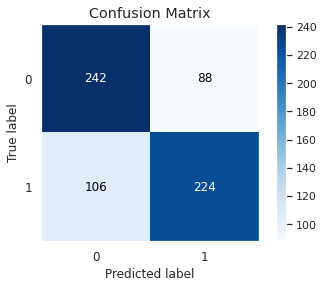

In [53]:
print(metrics.confusion_matrix(yt_a,predictions))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(yt_a,predictions)

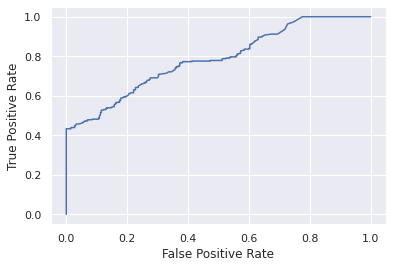

In [56]:
#define metrics
y_pred_proba = clf.predict_proba(xt_a)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_a,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [54]:
acc = metrics.accuracy_score(yt_a, predictions)
print("Accuracy = %.2f" %(acc))
f1 = metrics.f1_score(yt_a, predictions)
print("F1 = %.2f" %(f1))
p = metrics.precision_score(yt_a, predictions)
print("Precision = %.2f" %(p))
r = metrics.recall_score(yt_a, predictions)
print("Recall = %.2f" %(r))
loss = metrics.log_loss(yt_a, predictions)
print("log-loss = %.2f" %(loss))
auc = metrics.roc_auc_score(yt_a, predictions)
print("ROC-AUC = %.2f" %(auc))

Accuracy = 0.71
F1 = 0.70
Precision = 0.72
Recall = 0.68
log-loss = 10.15
ROC-AUC = 0.71


Adaboost classifier:

In [57]:
ad=AdaBoostClassifier(base_estimator=clf)

In [58]:
ad.fit(xt_a,yt_a)

AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=2,
                                                         random_state=0))

In [59]:
y_pred = ad.predict(xv_a)

[[205  26]
 [ 22 209]]


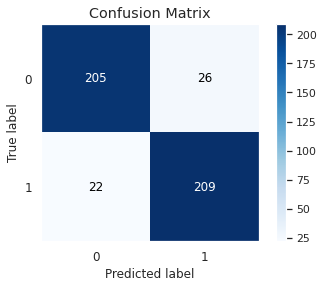

In [60]:
print(metrics.confusion_matrix(yv_a,y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(yv_a,y_pred)

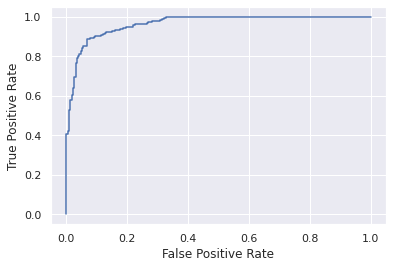

In [63]:
#define metrics
y_pred_proba = ad.predict_proba(xv_a)[::,1]
fpr, tpr, _ = metrics.roc_curve(yv_a,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [61]:
acc = metrics.accuracy_score(yv_a,y_pred)
print("Accuracy = %.2f" %(acc))
f1 = metrics.f1_score(yv_a,y_pred)
print("F1 = %.2f" %(f1))
p = metrics.precision_score(yv_a,y_pred)
print("Precision = %.2f" %(p))
r = metrics.recall_score(yv_a,y_pred)
print("Recall = %.2f" %(r))
loss = metrics.log_loss(yv_a,y_pred)
print("log-loss = %.2f" %(loss))
auc = metrics.roc_auc_score(yv_a,y_pred)
print("ROC-AUC = %.2f" %(auc))

Accuracy = 0.90
F1 = 0.90
Precision = 0.89
Recall = 0.90
log-loss = 3.59
ROC-AUC = 0.90


In [103]:
import joblib

In [104]:
joblib.dump(ad,'/content/drive/MyDrive/ddos_ML/ad.sav')

['/content/drive/MyDrive/ddos_ML/ad.sav']

SVM:

In [26]:
SVM = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
SVM.fit(x_a, y_a)

#Predict the response for test dataset
y_pred = SVM.predict(xt_a)

[[223 107]
 [158 172]]


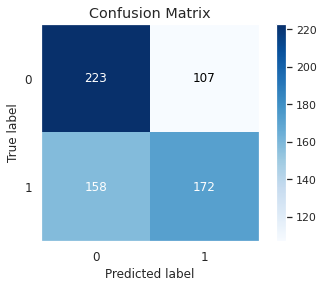

In [27]:
print(metrics.confusion_matrix(yt_a, y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(yt_a, y_pred)

In [28]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yt_a, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(yt_a, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(yt_a, y_pred))

Accuracy: 0.5984848484848485
Precision: 0.6164874551971327
Recall: 0.5212121212121212


Gradient Boosting Classifier

In [81]:
gb_clf = GradientBoostingClassifier(n_estimators=60, learning_rate=0.09, max_depth=3, random_state=0).fit(x_a, y_a)

In [82]:
y_pred = gb_clf.predict(xt_a)

[[278  52]
 [ 43 287]]


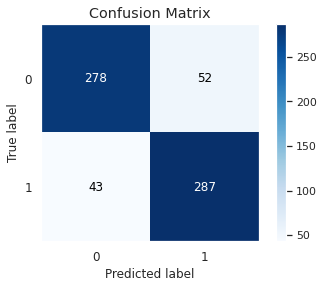

In [83]:
print(metrics.confusion_matrix(yt_a, y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(yt_a, y_pred)

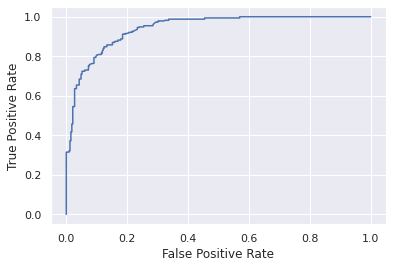

In [85]:
#define metrics
y_pred_proba = gb_clf.predict_proba(xt_a)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_a,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [84]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yt_a, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(yt_a, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(yt_a, y_pred))

Accuracy: 0.8560606060606061
Precision: 0.8466076696165191
Recall: 0.8696969696969697


KNN:

In [86]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(x_a, y_a)

KNeighborsClassifier()

In [87]:
y_pred = classifier.predict(xt_a)

[[268  62]
 [ 63 267]]


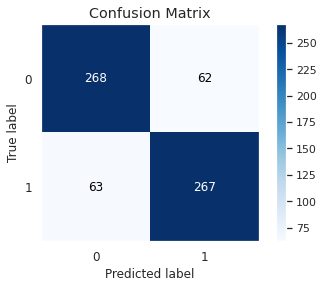

In [88]:
print(metrics.confusion_matrix(yt_a, y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(yt_a, y_pred)

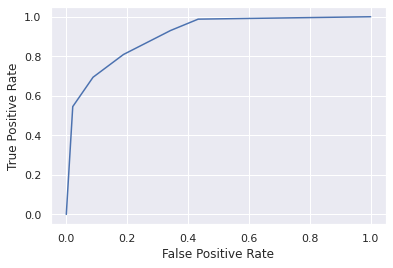

In [90]:
#define metrics
y_pred_proba = classifier.predict_proba(xt_a)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_a,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [89]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yt_a, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(yt_a, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(yt_a, y_pred))

Accuracy: 0.8106060606060606
Precision: 0.8115501519756839
Recall: 0.8090909090909091


Logistique Regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [92]:
modele_logit = LogisticRegression(penalty='none',solver='newton-cg')
modele_logit.fit(x_a, y_a)

LogisticRegression(penalty='none', solver='newton-cg')

In [93]:
y_pred = modele_logit.predict(xt_a)

[[226 104]
 [159 171]]


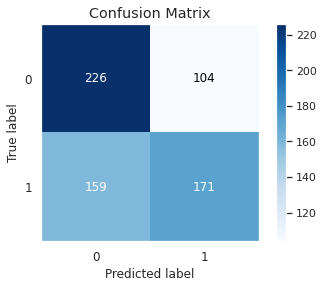

In [94]:
print(metrics.confusion_matrix(yt_a, y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(yt_a, y_pred)

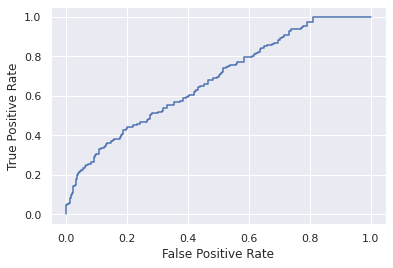

In [96]:
#define metrics
y_pred_proba = modele_logit.predict_proba(xt_a)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_a,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [95]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yt_a, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(yt_a, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(yt_a, y_pred))

Accuracy: 0.6015151515151516
Precision: 0.6218181818181818
Recall: 0.5181818181818182


naïve bayésienne

In [97]:
from sklearn.naive_bayes import GaussianNB

In [98]:
gnb = GaussianNB()

In [99]:
y_pred = gnb.fit(x_a, y_a).predict(xt_a)

[[263  67]
 [202 128]]


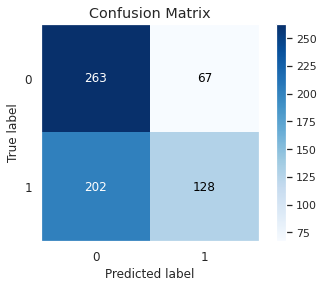

In [100]:
print(metrics.confusion_matrix(yt_a, y_pred))
# using scikiptlot
skplt.metrics.plot_confusion_matrix(yt_a, y_pred)

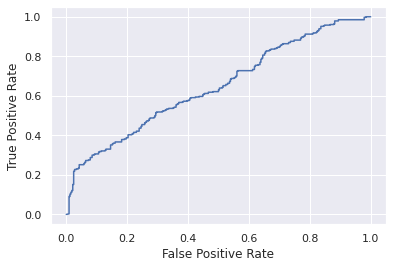

In [102]:
#define metrics
y_pred_proba = gnb.predict_proba(xt_a)[::,1]
fpr, tpr, _ = metrics.roc_curve(yt_a,  y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr)
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [101]:
# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(yt_a, y_pred))
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:",metrics.precision_score(yt_a, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:",metrics.recall_score(yt_a, y_pred))

Accuracy: 0.5924242424242424
Precision: 0.6564102564102564
Recall: 0.3878787878787879
